# PC Lab #3 - Group 8 - Bubu, Benedikt, Berkant

## Task #1: Basic manipulation and descriptive statistics

 - Import the Data_PCLab3_Twitter_Stock_Sentiment.csv data and describe
 the sample (data available on BBoard)
 - How many tweets, how many words per tweets, distribution of number of words
 per tweets, average sentiment, etc

In [2]:
# Loading in twitter data 

import pandas as pd

df = pd.read_csv(r"C:/Users/frien/OneDrive/Desktop/Bocconi/Finance with Big Data/PC labs/Data_PCLab3_Twitter_Stock_Sentiment.csv")

print(df)

                                                   Text  Sentiment
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2     user I'd be afraid to short AMZN - they are lo...          1
3                                     MNTA Over 12.00            1
4                                      OI  Over 21.37            1
...                                                 ...        ...
5786  Industry body CII said #discoms are likely to ...          0
5787  #Gold prices slip below Rs 46,000 as #investor...          0
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1
5790  #Sensex, #Nifty climb off day's highs, still u...          1

[5791 rows x 2 columns]


Now that we have loaded the twitter dataset, let us look at the data more closely. 

In [3]:
# Finding the number of tweets
num_tweets = len(df)

print(f"Number of tweets:", num_tweets)

# To find the number of tweets, we look at the length of the dataframe as it contains all the tweets in the sample.


Number of tweets: 5791


There are 5791 tweets in the data sample. Let us now look at the distributions.

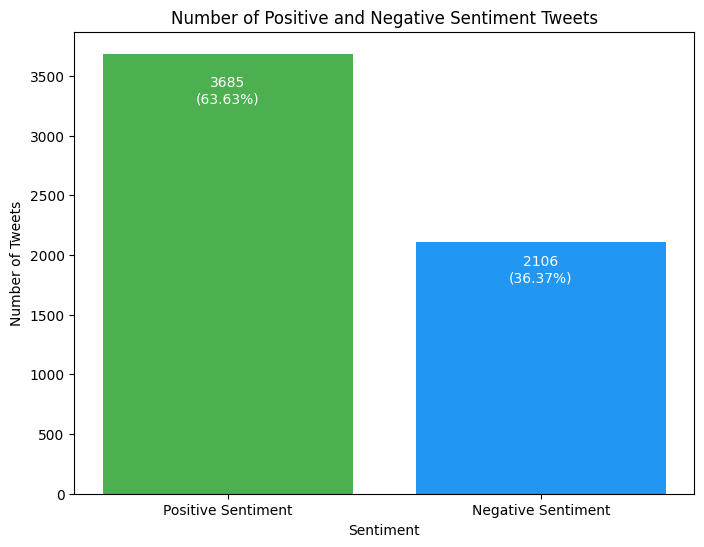

Number of positive sentiment tweets: 3685
Number of negative sentiment tweets: 2106
Percentage of positive sentiment tweets: 63.63%
Percentage of negative sentiment tweets: 36.37%
Average sentiment: 0.64


In [4]:
# Let's compare the number of tweets between negative and positive sentient
import matplotlib.pyplot as plt

# Number of positive sentiment tweets (Sentiment = 1)
num_positive = len(df[df['Sentiment'] == 1])

# Number of negative sentiment tweets  (Sentiment = 0)
num_negative = len(df[df['Sentiment'] == 0])

# Average number of sentiments
avg_sentiment = df['Sentiment'].mean()

# Calculate the percentage distribution of positive and negative sentiment
total_tweets = num_positive + num_negative
percent_positive = (num_positive / total_tweets) * 100
percent_negative = (num_negative / total_tweets) * 100

# Format Bar Chart data with both count and percentage
Tweet_sentiments = ['Positive Sentiment', 'Negative Sentiment']
count = [num_positive, num_negative]
percentages = [percent_positive, percent_negative]

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(Tweet_sentiments, count, color=['#4CAF50', '#2196F3'], linewidth=1.2)

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Number of Positive and Negative Sentiment Tweets')

# Add the count and percentage labels on top of each bar
for i, bar in enumerate(bars):
    # retrieve height of each bar (number of positive or negative tweets)
    yval = bar.get_height()
    # Position lables in the middle for x and y
    plt.text(bar.get_x() + bar.get_width()/2, yval - yval * 0.05, f'{int(yval)}\n({percentages[i]:.2f}%)', 
             ha='center', va='top', fontsize=10, color='white')
plt.show()

# Display the the counts and percentage
print(f"Number of positive sentiment tweets: {num_positive}")
print(f"Number of negative sentiment tweets: {num_negative}")
print(f"Percentage of positive sentiment tweets: {percent_positive:.2f}%") # round to 2 decimal points
print(f"Percentage of negative sentiment tweets: {percent_negative:.2f}%")
print(f"Average sentiment: {avg_sentiment:.2f}")


Here we can see already that there are more positive than negative setiment and the distribution is 63% positive and 37% negative sentiment tweets. This indicates a class imbalance in the data which can have an impact on modelling using logistic regression and neural networks by creating a bias to favor the majority class (positive setiment) making the models less accurate. This will be addressed later. This imbalance is also very clear as the average setiment is 0.64 which is slightly left skewed.

Average number of words per tweet: 14.01
Average number of characters per tweet: 78.51
Maximum number of words per tweet: 32
Minimum number of words per tweet: 2
Maximum number of characters per tweet: 154
Minimum number of characters per tweet: 6


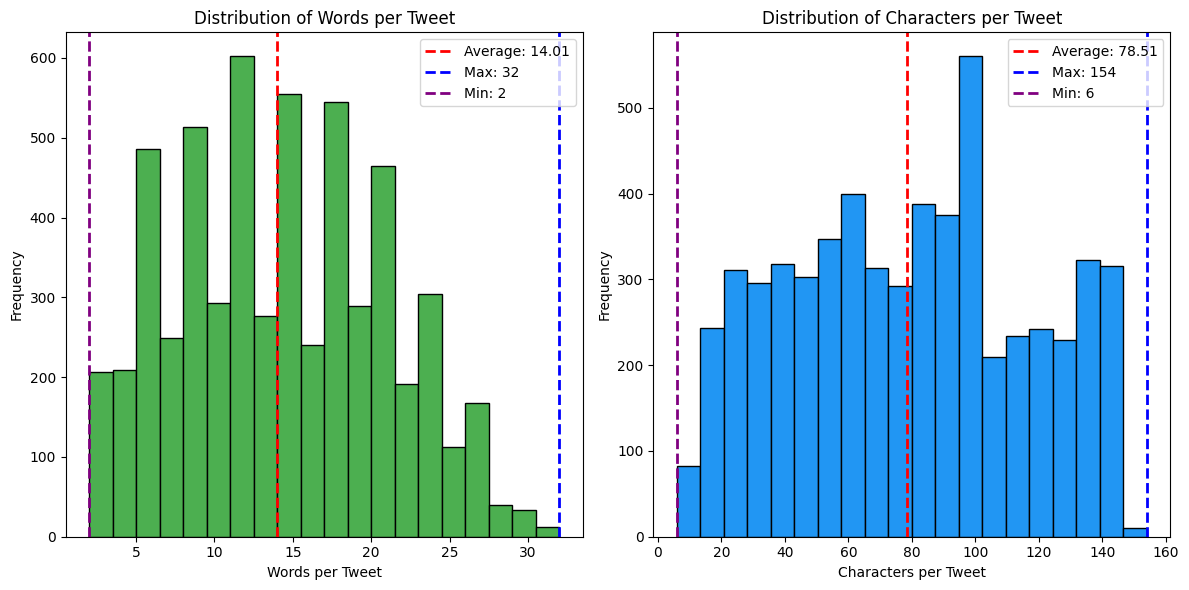

In [5]:
# Calculate number of words per tweet and number of characters per tweet
df['Word_Count'] = df['Text'].apply(lambda x: len(x.split()))
df['Character_Count'] = df['Text'].apply(lambda x: len(x))

# Calculate averages for number of words and characters per tweet
avg_words = df['Word_Count'].mean()
avg_characters = df['Character_Count'].mean()

# Calculate the maximum and minimum number of words/characters per tweet
max_words = df['Word_Count'].max()
min_words = df['Word_Count'].min()
max_chr = df['Character_Count'].max()
min_chr = df['Character_Count'].min()


print(f"Average number of words per tweet: {avg_words:.2f}")
print(f"Average number of characters per tweet: {avg_characters:.2f}")
print(f"Maximum number of words per tweet: {max_words}")
print(f"Minimum number of words per tweet: {min_words}")
print(f"Maximum number of characters per tweet: {max_chr}")
print(f"Minimum number of characters per tweet: {min_chr}")

# Create histogram for distribution of words/character count
plt.figure(figsize=(12, 6))

# First subplot: Histogram for words per tweet
plt.subplot(1, 2, 1)
plt.hist(df['Word_Count'], bins=20, color='#4CAF50', edgecolor='black')
plt.axvline(avg_words, color='red', linestyle='dashed', linewidth=2, label=f'Average: {avg_words:.2f}')
plt.axvline(max_words, color='blue', linestyle='dashed', linewidth=2, label=f'Max: {max_words}')
plt.axvline(min_words, color='purple', linestyle='dashed', linewidth=2, label=f'Min: {min_words}')
plt.xlabel('Words per Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Words per Tweet')
plt.legend()

# Second subplot: Histogram for characters per tweet
plt.subplot(1, 2, 2)
plt.hist(df['Character_Count'], bins=20, color='#2196F3', edgecolor='black')
plt.axvline(avg_characters, color='red', linestyle='dashed', linewidth=2, label=f'Average: {avg_characters:.2f}')
plt.axvline(max_chr, color='blue', linestyle='dashed', linewidth=2, label=f'Max: {max_chr}')
plt.axvline(min_chr, color='purple', linestyle='dashed', linewidth=2, label=f'Min: {min_chr}')
plt.xlabel('Characters per Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Characters per Tweet')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Neither of the distributions for words per tweet nor characters per tweet appears to follow a normal distribution. The words per tweet distribution looks more equal distribtion althoguh there are a few frequencies that have slightly higher frequencies also around the at almsot equal frequencies. The characters per tweet is similar, there does not seem to be a bell shape at all for normal distribution as it is spread out from the mean. Now we will look at some QQ plots. 

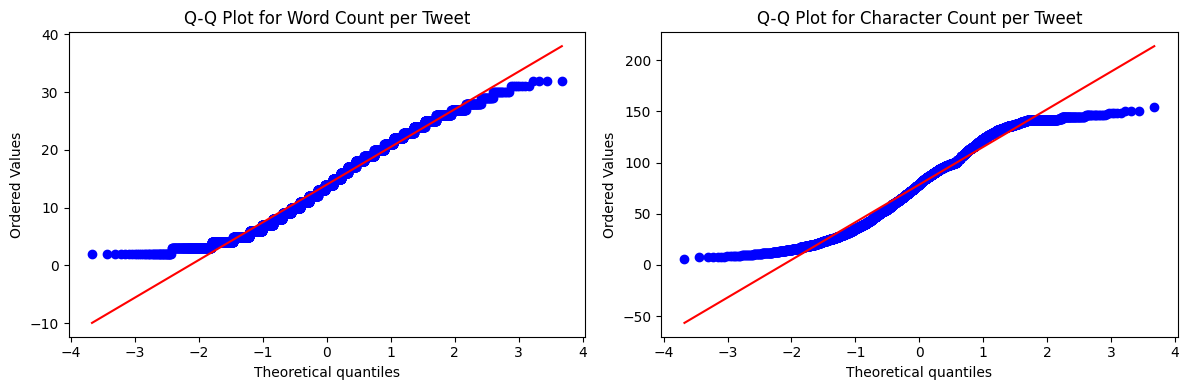

In [6]:
from scipy import stats
import matplotlib.pyplot as plt

# Create Q-Q plots for Word Count and Character Count
plt.figure(figsize=(12, 4))

# Q-Q plot for Word Count
plt.subplot(1, 2, 1)
stats.probplot(df['Word_Count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Word Count per Tweet')

# Q-Q plot for Character Count
plt.subplot(1, 2, 2)
stats.probplot(df['Character_Count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Character Count per Tweet')

plt.tight_layout()
plt.show()

We can clearly see from both QQ-plots that the points deviate significantly from the red diagonal line, especially at both the lower and upper ends of the plot, indicating that the data does not follow a normal distribution. For number of characters particularly there are much more deviation form the tails indicating more extreme values. 

## Task #2 : Cleaning and visualization

- Usual cleaning steps: remove punctuation, stopwords, short words, etc.

In [7]:
# Load in libraries for cleaning
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

df = pd.read_csv(r"C:/Users/frien/OneDrive/Desktop/Bocconi/Finance with Big Data/PC labs/Data_PCLab3_Twitter_Stock_Sentiment.csv")

# Get list of stop words form nltk
stop_words = set(stopwords.words('english'))

# Function to clean dataset 
def clean_text(text):
    # Remove punctuation and special characters and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Remove short words (here we choose a length less than 3)
    words = [word for word in words if len(word) >= 3]

    cleaned_text = " ".join(words)

    return cleaned_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frien\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
example_sentence = "$I love AI & Machine learning applied to Finance...!! ;)"
cleaned_example = clean_text(example_sentence)

print(cleaned_example)

love machine learning applied finance


In this function we cleaned the text by removing punctuation (!!, ., ;) and special letters ($, &), and convereted all letters to lowercase. We took out stop words like I, to and the and reemoved short words (< 3 letters). These were removed as seen from the example sentence. 
Note, that in this scenario, AI would be removed which could be an important word. In that case we could make an exception to the list by using exceptions = {'ai'}. In this case we do not know if AI has a positive or negative sentiment, but it would be worth noting if there are other categories. Now let us apply this function to the data as it seems to work on the example text.

In [8]:
# Apply clean_text to the data
df['Cleaned_Text'] = df['Text'].apply(clean_text)

df[['Text', 'Cleaned_Text']].head()

,Text,Cleaned_Text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,user aap movie return feageed indicator trades...
2,user I'd be afraid to short AMZN - they are lo...,user afraid short amzn looking like nearmonopo...
3,MNTA Over 12.00,mnta 1200
4,OI Over 21.37,2137


Looking at the first couple rows we can see that all punctuation, stop/short words have been removed. All letters are also lowercase, i.e., in row 0, XIDE in 'Text' is now xide in 'Cleaned_Text'

- Plot a word cloud for text with positive and negative sentiment separately

In [9]:
# Loading libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter


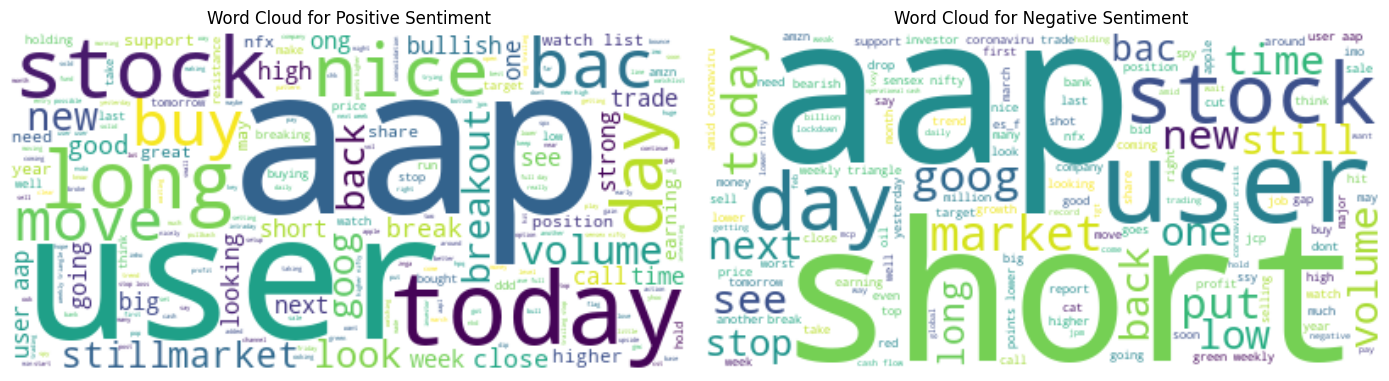

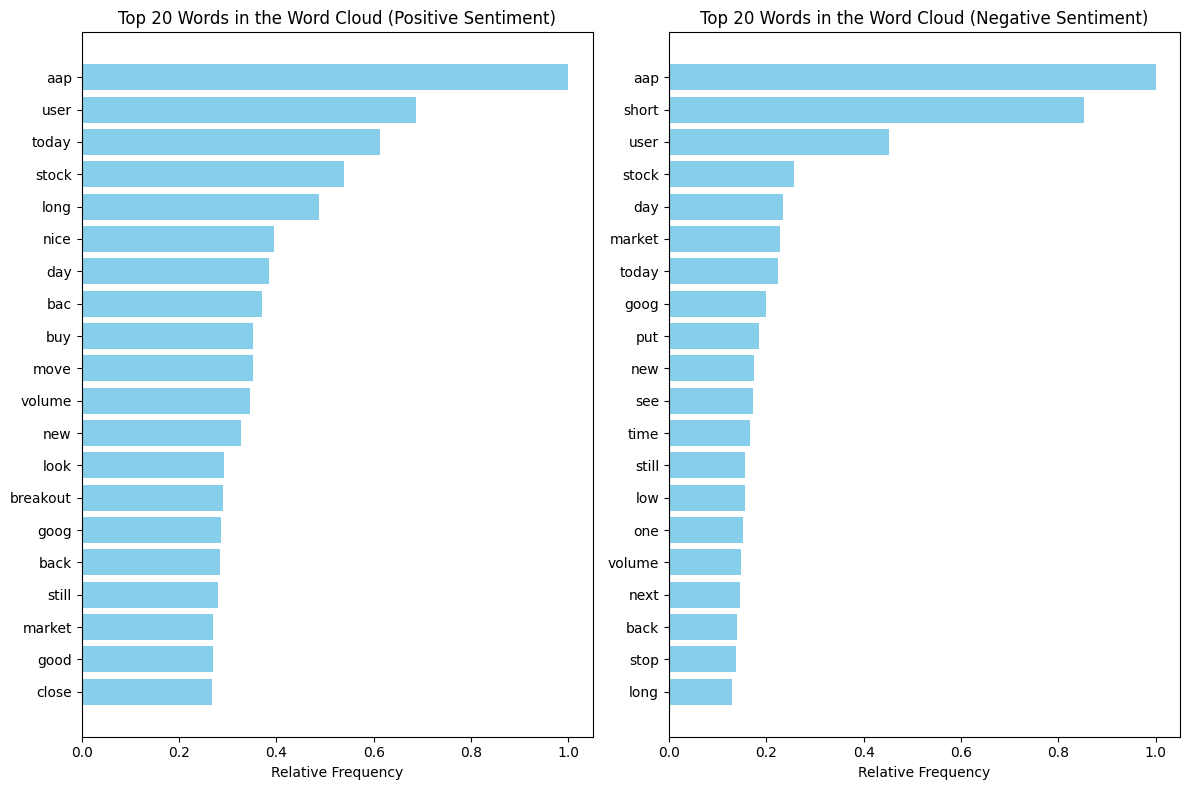

In [10]:
# Group cleaned text by sentiment
positive = df['Sentiment'] == 1
negative = df['Sentiment'] == 0

pos_texts = df[positive]['Cleaned_Text']
neg_texts = df[negative]['Cleaned_Text']

# Combine the cleaned text for positive and negative sentiments
pos_text = ' '.join(pos_texts)
neg_text = ' '.join(neg_texts)

# Create and generate a word cloud image:
wordcloud_pos = WordCloud(background_color="white").generate(pos_text)
wordcloud_neg = WordCloud(background_color="white").generate(neg_text)

# Display the generated image:
plt.figure(figsize=(14, 7))

# Positive sentiment word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Sentiment')

# Negative sentiment word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')

plt.tight_layout()
plt.show()

# Extract word frequencies from the word cloud
word_frequencies_pos = wordcloud_pos.words_
word_frequencies_neg = wordcloud_neg.words_

# Convert the frequencies to a DataFrame for easier manipulation
freq_df_pos = pd.DataFrame(word_frequencies_pos.items(), columns=['Word', 'Frequency'])
freq_df_neg = pd.DataFrame(word_frequencies_neg.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency
freq_df_pos = freq_df_pos.sort_values(by='Frequency', ascending=False)
freq_df_neg = freq_df_neg.sort_values(by='Frequency', ascending=False)

# Plot the word frequencies using a bar chart
plt.figure(figsize=(12, 8))

# Positive Sentiment
plt.subplot(1, 2, 1)
plt.barh(freq_df_pos['Word'].head(20), freq_df_pos['Frequency'].head(20), color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
plt.xlabel('Relative Frequency')
plt.title('Top 20 Words in the Word Cloud (Positive Sentiment)')

# Negative Sentiment
plt.subplot(1, 2, 2)
plt.barh(freq_df_neg['Word'].head(20), freq_df_neg['Frequency'].head(20), color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
plt.xlabel('Relative Frequency')
plt.title('Top 20 Words in the Word Cloud (Negative Sentiment)')

plt.tight_layout()
plt.show()


Looking at the word clouds, we can see some common words for both of the sentiments, indicating they are not particularly good for classification even if they are the most common. Clearly in both sentiments, there are common market-related terms like "stock" and "market". Further, "aap", "new", "day, and "user" are also used by both a lot indicating that the apple stock has both positive and negative sentiments and these words would not be identifying for a classification model. 

Note, here we can see some words already in the word cloud that are more frequent in ne then the other. For instance, words more frequently used in the posititve sentiment, like "buy", "nice", "higher", "bullish", "close", "strong", and "good". Words that are more frequently metnioned in the negative sentiment cloud, are "short", "stop", "put", "low", 

Now let us remove some of these common words and see the word cloud and frequencies again.

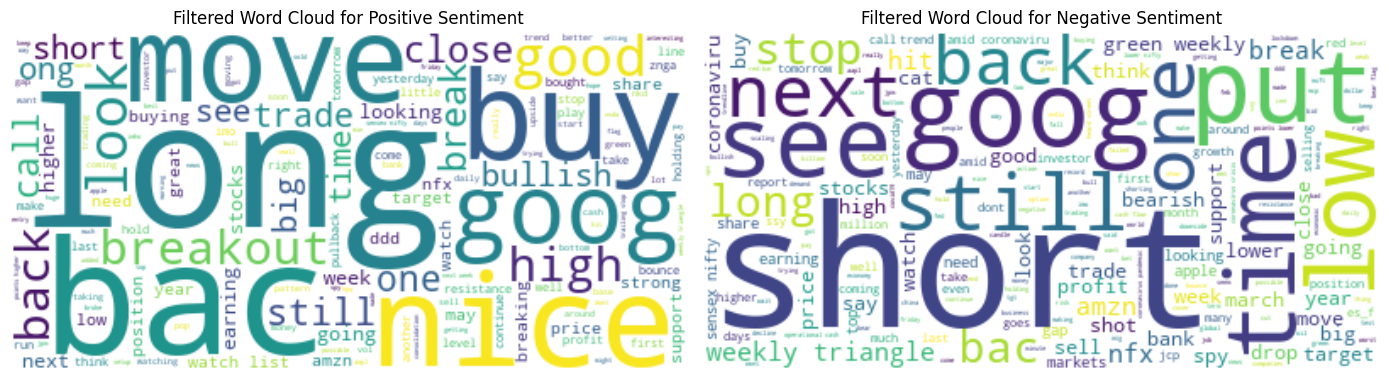

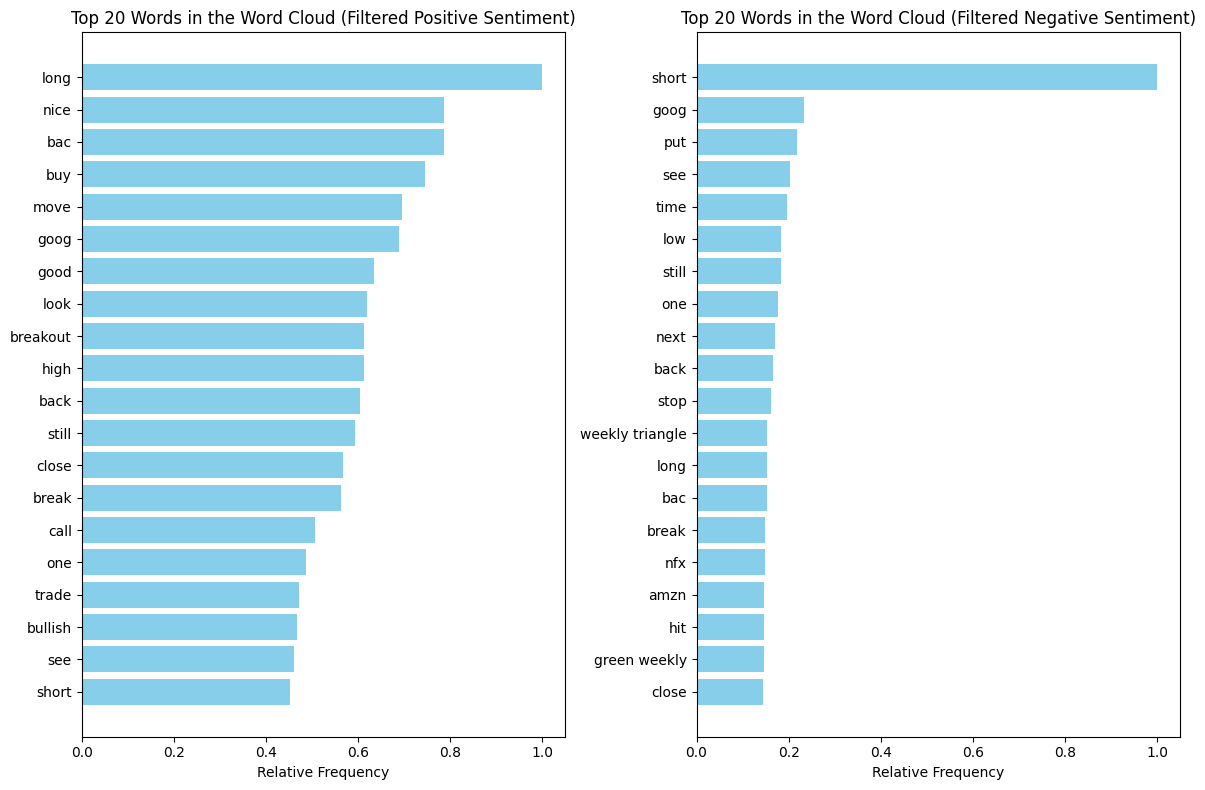

In [11]:
# Specific words to be removed
words_to_remove = {'aap', 'user', 'stock', 'day', 'new', 'volume', 'today', 'market'}

# Filter out the specified words from the cleaned text for both sentiments
pos_text_filtered = ' '.join([word for word in pos_text.split() if word not in words_to_remove])
neg_text_filtered = ' '.join([word for word in neg_text.split() if word not in words_to_remove])

# Create and generate a word cloud image with the filtered text
wordcloud_pos_filtered = WordCloud(background_color="white").generate(pos_text_filtered)
wordcloud_neg_filtered = WordCloud(background_color="white").generate(neg_text_filtered)

# Display the generated images for filtered text
plt.figure(figsize=(14, 7))

# Positive sentiment word cloud without specified words
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos_filtered, interpolation='bilinear')
plt.axis("off")
plt.title('Filtered Word Cloud for Positive Sentiment')

# Negative sentiment word cloud without specified words
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg_filtered, interpolation='bilinear')
plt.axis('off')
plt.title('Filtered Word Cloud for Negative Sentiment')

plt.tight_layout()
plt.show()

# Extract word frequencies from the filtered word clouds
word_frequencies_pos_filtered = wordcloud_pos_filtered.words_
word_frequencies_neg_filtered = wordcloud_neg_filtered.words_

# Convert the frequencies to DataFrames for easier manipulation
freq_df_pos_filtered = pd.DataFrame(word_frequencies_pos_filtered.items(), columns=['Word', 'Frequency'])
freq_df_neg_filtered = pd.DataFrame(word_frequencies_neg_filtered.items(), columns=['Word', 'Frequency'])

# Sort the DataFrames by frequency
freq_df_pos_filtered = freq_df_pos_filtered.sort_values(by='Frequency', ascending=False)
freq_df_neg_filtered = freq_df_neg_filtered.sort_values(by='Frequency', ascending=False)

# Plot the filtered word frequencies using bar charts
plt.figure(figsize=(12, 8))

# Positive Sentiment
plt.subplot(1, 2, 1)
plt.barh(freq_df_pos_filtered['Word'].head(20), freq_df_pos_filtered['Frequency'].head(20), color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
plt.xlabel('Relative Frequency')
plt.title('Top 20 Words in the Word Cloud (Filtered Positive Sentiment)')

# Negative Sentiment
plt.subplot(1, 2, 2)
plt.barh(freq_df_neg_filtered['Word'].head(20), freq_df_neg_filtered['Frequency'].head(20), color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
plt.xlabel('Relative Frequency')
plt.title('Top 20 Words in the Word Cloud (Filtered Negative Sentiment)')

plt.tight_layout()
plt.show()


Now, we can cleary see some more differences between positive and negative sentiments. Words that are now more specific to positive sentiments include "long", "nice", "buy", "move", "breakout", "good", "high", "call" and "bullish". These terms are more associated with optimistic outlook (high, nice, good). Furthemore it seems to factor trading opportunities for upwards movements. i.e., looking for points to "buy" stocks. "bullish" also is a positive outlook on the market/assets since prices are expected to increases. "long" position also benefits from upward prive movements which is a positive outlook. "breakout" also refers to the breakout strategu in trading where traders wait for a stock price to break above a threshold indicating a positive trend. "call" may refer to a call option so if the price of the stock incerases you make a profit by buying at the agreed price and reselling it.

The same goes for the negative sentiment, words more specific to here are "short", "put", "low", "still", "back", "stop". 
here "short" opposite to long is when traders sell a stock that they expect to decrease in value which is inherently negative. "Put" rmay refer to put options as they increase in value when the underlying stock value decreases. "low" suggests declining stock prices and "stop" is a word with rather negative conotations, it can also refer to stop loss so a minimum amount for losses. "back" and "still" may also suggest pullbacks and "still" may refer to stagnation in the market so no opportunities to trade and create profit.

- What is the number of unique words?

In [13]:
pos_words = set(pos_text.split())
neg_words = set(neg_text.split())

# Total unique words
unique_words = set(' '.join(df['Cleaned_Text']).split())

# Number of unique words
unique_words_positive = len(pos_words)
unique_words_negative = len(neg_words)
unique_words_total = len(unique_words)

print(f'Number of Positive Unique Words:', unique_words_positive)
print(f'Number of Negative Unique Words:', unique_words_negative)
print(f'Number of Unique Words:', unique_words_total)

Number of Positive Unique Words: 7967
Number of Negative Unique Words: 5868
Number of Unique Words: 11143


The number of unique words across the entire Cleaned_Text column is 11,143. This count represents the distinct words used in all the cleaned tweets. The nmber ofpositive unique words is 7967 and for negative 5868. There seems to be almost 2000 more positive unique words compared to negative. However, some of these can be the same.

## Task #3 : Sentment analysis

 More usual steps: Tokenizing the text and padding
 - Tokenize: vectorize text corpus, transform text into numbers
 - Padding: make all sentences the same lenght (fill with 0 short sentences)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Text Vectorization Layer
max_tokens = 10000 
"""
First we limnit the vocabulary size to 10,000 words. As there are 11,143 unique words, limiting this to 10,000 will exclude 
less frequent words that does not contribute to the model and also so we do not overfit on rare terms. Here we are performing 
word level tokenization as each individual word is being considered a token. This preserves the natural order of words which is important for 
sequence-based models (RNN) which we will be performing. Note if we were to use texts longer than tweets or tweets in different lagnagues(different word order)
it would be better to use n-gram tokenization and bag of words approach. For now tweets are quite short and seem to all be in english.
"""
max_length = 35 
"""
In Task 1 we see that the average length of a tweet is 14 words and maximum length in 32 words. we should thus set a max length of 35 to ensure all the tweets 
are captured.
"""

# use text vectoization to perform tokenization
text_vectorization = TextVectorization(
    output_mode="int", # ensure output integer tokens
    max_tokens = max_tokens,
    output_sequence_length = max_length
    )

# Adapt the TextVectorization layer on the cleaned text data
text_vectorization.adapt(df['Cleaned_Text'])

# Transform the cleaned text into integer sequences
vectorized_text = text_vectorization(df['Cleaned_Text'])

# Convert to a numpy array
vectorized_text = vectorized_text.numpy()

# Pad the sequences to ensure uniform input shape
padded_sequences = pad_sequences(vectorized_text, padding='post')

print(f"Padded sequences shape: {padded_sequences.shape}")

Padded sequences shape: (5791, 35)


Split the sample in a train / test dataset (test = 10% of the total sample)

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset (90% train, 10% test)
train_X, test_X, train_y, test_y = train_test_split(padded_sequences, df['Sentiment'], test_size=0.1, random_state=42)

Train model of your choice (RNN, LTSM, etc.) to predict the sentiment (1 or 0)
 on the test sample (you could use embedding layer to reduce the dimension of
 the problem)

Here we will train an LSTM Model. We choose to use LSTM instead of an RNN because they have the ability to manage noise better which is the case for tweets as they can often contain typos and abbreviations. An LSTM can better remember and forget information which is more robust as they can retain important information for a longer time. In contrast, RNN has a main limitation of the vanishing gradient probelm, which means they might have trouble retaining relevatn information. 

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers


# Defining the input layer
inputs = keras.Input(shape=(max_length,), dtype = "int64")

# Embedding Layer 
embedded = layers.Embedding(input_dim = max_tokens, output_dim = 256)(inputs)

# Bidirectional LSTM layer
x = layers.Bidirectional(layers.LSTM(32))(embedded)

# Dropout for regularization
x = layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l1(0.01))(x)

# Output layer
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

# Model compilation
model.compile(optimizer="rmsprop",
      loss="binary_crossentropy",
      metrics=["accuracy"])

model.summary()

# callbacks: 
callbacks = [
    keras.callbacks.ModelCheckpoint("best_lstm_model.keras", save_best_only=True, monitor="val_loss")
]

# Train the model on the training data
batch_size = 32
epochs = 15

history = model.fit(
    train_X, train_y,
    validation_data=(test_X, test_y), 
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks
)

model = keras.models.load_model("best_lstm_model.keras")


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_7 (Embedding)         │ (None, 35, 256)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 64)             │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,636,097 (10.06 MB)

 Trainable params: 2,636,097 (10.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6325 - loss: 2.3944 - val_accuracy: 0.6345 - val_loss: 0.9238
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6529 - loss: 0.7592 - val_accuracy: 0.7207 - val_loss: 0.6089
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8012 - loss: 0.5372 - val_accuracy: 0.7707 - val_loss: 0.5685
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8880 - loss: 0.4045 - val_accuracy: 0.7603 - val_loss: 0.5850
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9166 - loss: 0.3239 - val_accuracy: 0.7362 - val_loss: 0.6334
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9406 - loss: 0.2643 - val_accuracy: 0.7397 - val_loss: 0.6423
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9512 - loss: 0.2202 - val_accuracy: 0.7466 - val_loss: 0.6821
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9647 - loss: 0.1835 - val_accu

Let us first discuss how we built the model. The model architecture of the LSTM consists of several key layers and is designed fro the binary sentiment classification (positive vs negative) of tweets. 
The first step of the building the model is the input layer. The model takes our cleaned and tokenized text data which is represented as sequences of integers. Here the input shape is defined as the max_length (max amount of words in a tweet) which is padded to ensure that all lengths are the same for so our model can process it. 
Then we add an embedding layer which maps each word to a dense vector of 256 which converts sparse, high-dimensional words indices into lower dimensional representation. Here it can help capture relationship between words especially between the sentiments, and improve the model's ability to understand the text data. 
Then we build a bidirectional LSTM layer with 32 units to process the input sequences. Using a bidirectional layer allows the model to learn from both the past and future context of each word, which can improve performance on tasks where the context on either side of a word matters.
We add a lasso regularization layer to the dense layer with ReLU actiivation to add a penalty to larger weights where some weights are driven to 0 and simplifies the model and only keep those that are useful for prediction.  
Then in the output layer, we use a dense layer with sigmoid activation. This is because we are doing binary classification os sentiment in tweets so we will get an output probabiltiy between 0 and 1.

Note, for a better model, we can add  dropout layers which drops (sets to 0) a bunch of neurons in each training stpe so it is forced to learn mroe robust generalized features. By increasing the dropout layer we will drop a larger fraction in each traingin iteration which can reduce overfitting the opposite is true for decreasing the dropout rate so there may be more potential for overfitting. We did not test this as to not contaminate the test data as now that we have run the test accuracy the model will continue remembering for testing a better model, we should have split the original sample into training, validation and test data, so we can experiment more with the validation data before evaluating on the test data. 

The model is compiled using the RMSprop optimizer, which is effective for training recurrent neural networks. RMSprop adapts the learning rate based on the moving average of squared gradients, which helps with the convergence of the model.
The binary cross-entropy loss function is used, which is appropriate for binary classification tasks. This loss function measures the difference between the predicted probabilities and the true labels.
The metric used for evaluation is accuracy, which indicates the proportion of correct predictions.

note, that we could also use and adams optimizer instead of RMS prop which has a more adaptive leranign rate adjustment. This would be good for larger models, however, in our case the model is not too complext and works well and stabilizes. If there were problems with convergence, we woudl switch to the adams. But again, it is a trial and error process therefore as before we could have experimented more without data leak into the test set with a validation samnple as well. 

In the model training, we implement only 1 callback. We use the checkpoint callback so we can retrieve the model's best epoch. And we base these on validaiton loss because it penalizes mistakes more heavily than validation accuracy. we could have added other callbacks for example earlstopping to help find the exact point during trainng where you have found the most generalizable fit, however this was not included in the call back.  

The model is trained on the preprocessed and split training data (train_X, train_y), with 10% of the training data set aside for validation. This helps monitor the model's performance on unseen data and prevents overfitting.

The batch size is set to 32, meaning that 32 samples are processed at a time before updating the model weights.
The model is trained for 15 epochs, which seemed to be ok as validation loss did not continue decreasing after this point.

Now let us plot the training and validation loss. 

In [27]:
import numpy as np

# Function for printing best loss and accuracy
def print_best_val_loss_and_accuracy(history):
    history_dict = history.history

    # Find the index of the best validation loss
    best_val_loss_index = np.argmin(history_dict['val_loss'])

    # Retrieve the best validation loss
    best_val_loss = history_dict['val_loss'][best_val_loss_index]

    # Retrieve the validation accuracy corresponding to the best validation loss
    best_val_accuracy = history_dict['val_accuracy'][best_val_loss_index]

    print(f"Best Validation Loss: {best_val_loss}")
    print(f"Validation Accuracy at Best Loss: {best_val_accuracy}")


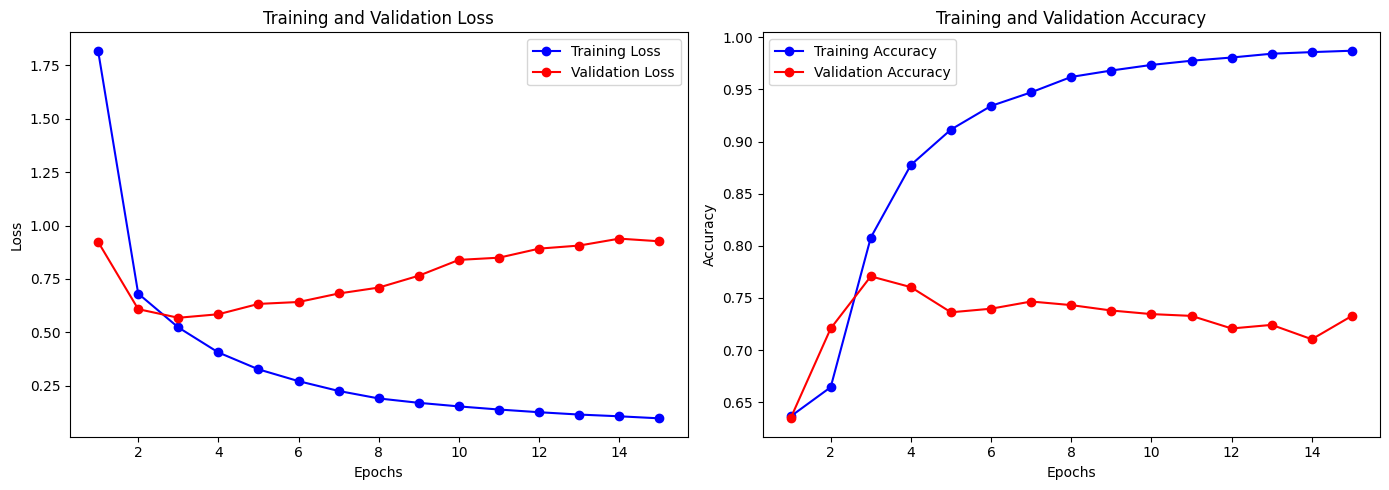

Best Validation Loss: 0.5685341954231262
Validation Accuracy at Best Loss: 0.7706896662712097


In [31]:
import matplotlib.pyplot as plt

# Assuming 'history' is the return value from model.fit()
history_dict = history.history

# Extracting loss and accuracy history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))

# Training and validation loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjusts the plots to ensure they don't overlap
plt.show()

print_best_val_loss_and_accuracy(history)

the best model has validation loss at 0.578 and the validation accuracy at best loss at 0.75. Looking at the training and validation loss they both initially decrease, indicating learning. However, around epoch 3, the validation loss starts to increase, while the training loss keeps decreasing, signaling overfittin and the model is beginning to memorize the data. 
Training accuracy consistently rises, showing good fit to the training data. Validation accuracy peaks around epoch 3-4, then fluctuates and declines, further confirming overfitting. To improve the model we could try to regularize more with dropout or use early stopping. The best accuract at the lowest validation loss is around 77% which is alright but not particularly high. 



19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


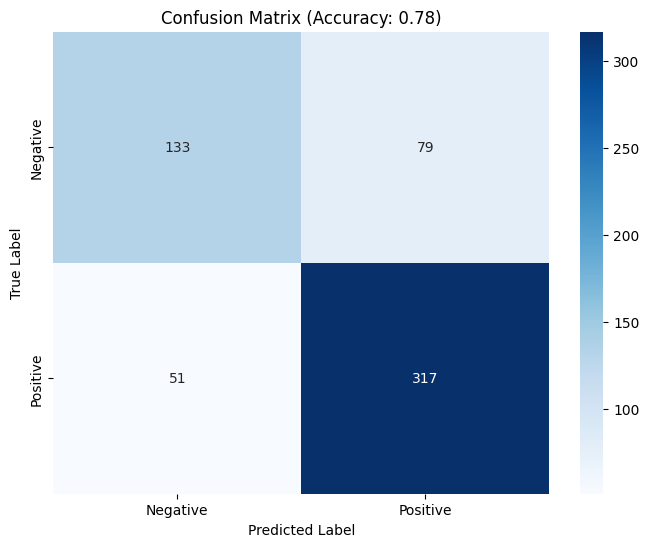

Accuracy Score: 0.78


In [107]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best model saved during training
model = keras.models.load_model("best_lstm_model.keras")

# Make sure test_X and test_y are already defined in the environment
# Predict the sentiment on the test data
test_predictions = (model.predict(test_X) > 0.5).astype("int32")

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, test_predictions)

# Compute the accuracy score
accuracy = accuracy_score(test_y, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

# Print the accuracy score
print(f"Accuracy Score: {accuracy:.2f}")

Overall, the accuracy of the model is 78% (not at the lowest validation loss) so the model correctly classified 78% of the tweets in the test set. With the lowest validation score it was around 77% which is not too different. Looking at the confusion matrix, we can see that the model predict 133 negative tweets (True Negatives) correctly, 
The model also correctly predicted 317 positive tweets (True Positives). However, tjhe model incorrectly classified 79 negative tweets at positive (false positives) and 51 positive tweets as negative (false negatives)

In [32]:
true_negatives = 133
false_positives = 79
false_negatives = 51
true_positives = 317

# Sensitivity (Recall) = TP / (TP + FN)
sensitivity = true_positives / (true_positives + false_negatives)

# Specificity = TN / (TN + FP)
specificity = true_negatives / (true_negatives + false_positives)

print(f'Sensitivity:', sensitivity)
print(f'Specificity:', specificity)


Sensitivity: 0.8614130434782609
Specificity: 0.6273584905660378


There is a rather high Sensitivity score (0.86) indicating that the model is good at classifying positive tweets as it is able to identify 86% of them as there is a large number of true positives. However, the model is not as good at at classifyng negative tweets (63% specificity) as it just about beats randomly picking (50%) as it only gets true negatives correct 63% of the time. The False Positives are thus relatively high. This could be due to the class imbalance that was previously found in task 1. The data has many more positive than negative tweets. 

## Task 5

 Use the list of tickers gathered during last PC Lab (see the web-scrapping part)
 to compute the number of tweets about each stock
 - e.g., AAPL: 36 tweets, 12 negative, 24 positive

As we did not do the webscraping exercise, we will take the 8 stocks from last PC labs. 

In [47]:
ticker_list = ["AAP", "BA", "T", "MGM", "AMZN", "IBM", "TSLA", "GOOG"]
# Note, that in the last lab apple = AAPL, but because with this data it is aap, we will match here. 

# Display the first few elements of the list
ticker_list

['AAP', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

First let us ensure that fromr our cleaned text we make an exception for short words as some of our tickers are under 3 characters.

In [48]:
from nltk.corpus import stopwords

# Re-import stop words from NLTK
stop_words = set(stopwords.words('english'))

# exceptions for short words
exceptions = {'apl', 'ba', 't', 'ibm', 'amzn', 'tsla', 'goog', 'mgm'} 

# Reapply the cleaning function to ensure short words are removed
def clean_text(text):
    # Remove punctuation and special characters and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Remove short words (here we choose a length less than 3)
    words = [word for word in words if len(word) >= 3 or word in exceptions]

    cleaned_text = " ".join(words)

    return cleaned_text

# Apply the clean_text function to ensure short words are removed
df['Cleaned_Text'] = df['Text'].apply(clean_text).str.upper()  # Convert to uppercase for matching tickers

# Initialize a dictionary to store the tweet counts for each ticker
tweet_counts = {ticker: {'Total': 0, 'Positive': 0, 'Negative': 0} for ticker in ticker_list}

# Loop through the DataFrame and count the mentions of each ticker
for _, row in df.iterrows():
    tweet_text = row['Cleaned_Text']
    sentiment = row['Sentiment']  # Use word boundaries to match the ticker as a whole word
    
    # Check if any ticker is mentioned as a whole word in the tweet
    for ticker in ticker_list:
        #  Match the ticker as a whole word
        if re.search(rf'\b{ticker}\b', tweet_text):  
            tweet_counts[ticker]['Total'] += 1
            if sentiment == 1:
                tweet_counts[ticker]['Positive'] += 1
            else:
                tweet_counts[ticker]['Negative'] += 1

# Convert the tweet counts dictionary to a DataFrame for ranking
tweet_counts_df = pd.DataFrame.from_dict(tweet_counts, orient='index').reset_index()
tweet_counts_df.columns = ['Ticker', 'Total_Tweets', 'Positive_Tweets', 'Negative_Tweets']

tweet_counts_df

,Ticker,Total_Tweets,Positive_Tweets,Negative_Tweets
0,AAP,880,487,393
1,BA,9,4,5
2,T,0,0,0
3,MGM,12,8,4
4,AMZN,108,61,47
5,IBM,21,15,6
6,TSLA,2,2,0
7,GOOG,198,127,71


Looking at the results, we can see that there are the most tweets on AAPL which was very evident as this was one of the largest words in the word cloud. Further they were both mentioned almsot equally in positive and negative tweets which explains why they were so big in the word clouds. Google and Amazon are then also mentioned a few time but not nearly as much as apple. This alread indicates that apple has a much higher amount of media attention compared to the others however, it is split between positive and negative.

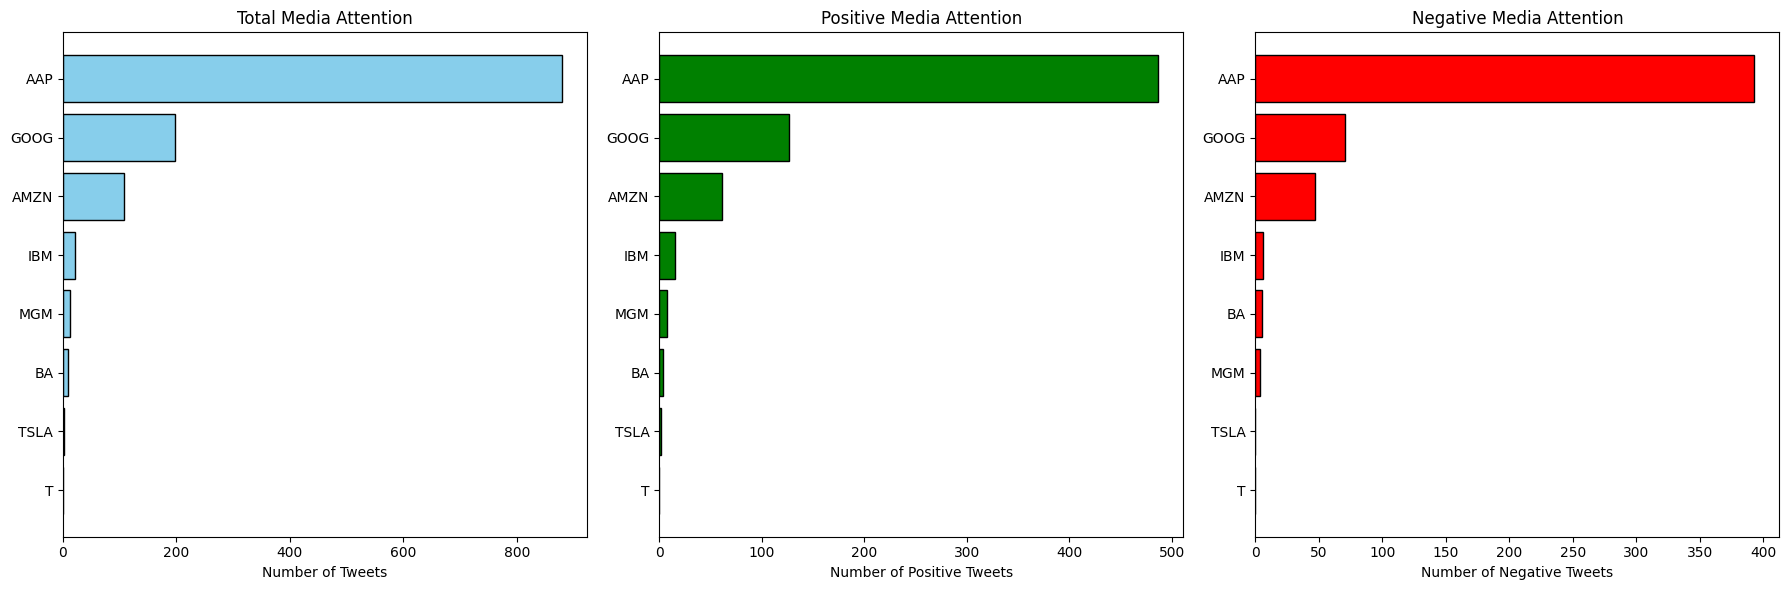

In [55]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Total_Tweets, Positive_Tweets, and Negative_Tweets
sorted_by_total = tweet_counts_df.sort_values(by='Total_Tweets', ascending=True)
sorted_by_positive = tweet_counts_df.sort_values(by='Positive_Tweets', ascending=True)
sorted_by_negative = tweet_counts_df.sort_values(by='Negative_Tweets', ascending=True)

# Create a figure with three subplots
plt.figure(figsize=(18, 6))

# Plot Total Media Attention
plt.subplot(1, 3, 1)
plt.barh(sorted_by_total['Ticker'], sorted_by_total['Total_Tweets'], color='skyblue', edgecolor='black')
plt.xlabel('Number of Tweets')
plt.title('Total Media Attention')

# Plot Positive Media Attention
plt.subplot(1, 3, 2)
plt.barh(sorted_by_positive['Ticker'], sorted_by_positive['Positive_Tweets'], color='green', edgecolor='black')
plt.xlabel('Number of Positive Tweets')
plt.title('Positive Media Attention')

# Plot Negative Media Attention
plt.subplot(1, 3, 3)
plt.barh(sorted_by_negative['Ticker'], sorted_by_negative['Negative_Tweets'], color='red', edgecolor='black')
plt.xlabel('Number of Negative Tweets')
plt.title('Negative Media Attention')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


After ranking we can see that the order is more or less the same when we solely look by the count for media attention in total, positive and negative. Apple, google, amazon and bm have the highest about of media attention. Followed by MGM for totaln and positive while BA have more for negative. Interestingly, TSLA only has 2 observations in total, however, both these observations are positive. Let's try to show a stacked bar to also get an idea on the proportions of good and bad media attention.

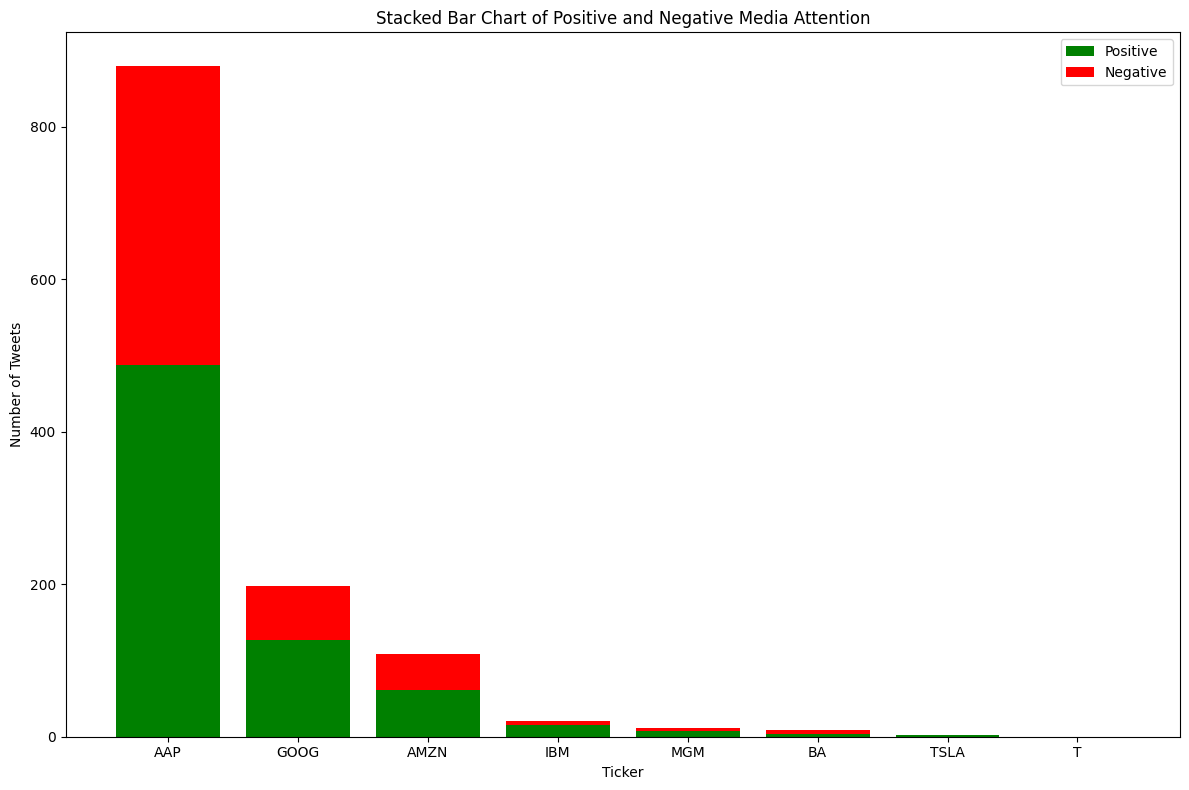

In [49]:
# Calculate percentage of positive and negative tweets for each ticker
tweet_counts_df['Positive_Percentage'] = (tweet_counts_df['Positive_Tweets'] / tweet_counts_df['Total_Tweets']) * 100
tweet_counts_df['Negative_Percentage'] = (tweet_counts_df['Negative_Tweets'] / tweet_counts_df['Total_Tweets']) * 100

# Sort the data by total media attention
tweet_counts_df_sorted = tweet_counts_df.sort_values(by='Total_Tweets', ascending=False)

# Create a stacked bar chart to show the proportion of positive and negative tweets
plt.figure(figsize=(12, 8))
plt.bar(tweet_counts_df_sorted['Ticker'], tweet_counts_df_sorted['Positive_Tweets'], color='green', label='Positive')
plt.bar(tweet_counts_df_sorted['Ticker'], tweet_counts_df_sorted['Negative_Tweets'], 
        bottom=tweet_counts_df_sorted['Positive_Tweets'], color='red', label='Negative')

# Adding labels and title
plt.xlabel('Ticker')
plt.ylabel('Number of Tweets')
plt.title('Stacked Bar Chart of Positive and Negative Media Attention')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Here we can more clearly see that AAPL, has a high volume of both positive and negative media attention. Google has quite a bit more positive compared to negative media attention which indicates that perhaps google stocks are doing well and therfore associated with positive sentiment more. Amazon also has slightly more positive tweets, however, there is more of a mix like apple. IBM, MGM and BA have very limited attention and it seeems that sentiment is more or less equal, with slight bias towards positive sentiment. TSLA and T have the least media focus whil all of TSLA is positive. 